In [1]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from data_loader import load_npy
from utilities import load_json, bgr_to_rgb_img
from segmap_v2 import SegmentaionMap

In [2]:
DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier/outputs/images_augmented")
# DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/outputs/img_3_sample_valid_centered_small")

In [3]:
PKG_1_PARAMS = load_json("pkg_1_config.json")

In [4]:
img_arr = load_npy(DATASET_PATH / "dataset_images_aug.npy") /255
ann_arr = load_npy(DATASET_PATH / "dataset_annots_aug.npy")

## Testing Sliding window splitting

In [5]:
# Local modules
from sliding import SlidingWindow
import segmap

In [6]:
def sort_img_arr_by_class(ann_arr, PARAMS):
    sector_name = [f"sec_{i}" for i in range(ann_arr.shape[0])]
    sec_db = {class_name: [] for class_name in sector_name}

    img_id = 0
    for i in range(ann_arr.shape[0]):
        annot = ann_arr[i, :, :, 0]
        segmap_obj = SegmentaionMap(annot,
                                    PARAMS["num_classes"],
                                    PARAMS["bg_class_id"])
        # fg_cls / activated_px, bg_cls/ total_px
        cls_den_arr = segmap_obj.activation_density()
        try:
            detected_cls = np.where(cls_den_arr > PARAMS["det_thres"])[0][0]
        except IndexError:
            # Pushing images with less than threshold to or first id or last id
            detected_cls = 0

        sec_db[f"sec_{i}"]= detected_cls
        
    return sec_db

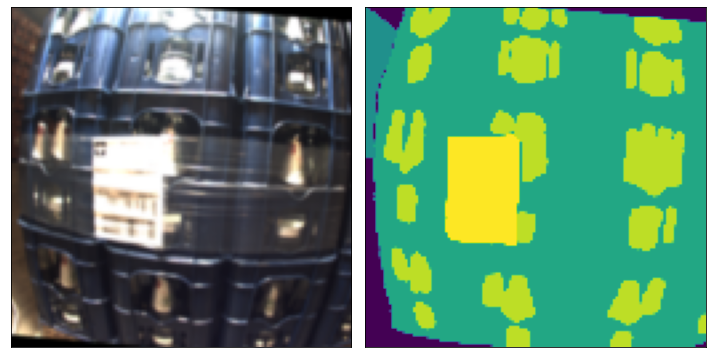

In [7]:
index = 5
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(bgr_to_rgb_img(img_arr[index,:,:,3:6]))
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(ann_arr[index,:,:,0])
plt.clim([0,10])
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

In [33]:
sample_ann = ann_arr[index,:,:,:]
my_scale = 2
sliding_obj = SlidingWindow(sample_ann, w_scale=my_scale, PARAMS= PKG_1_PARAMS)

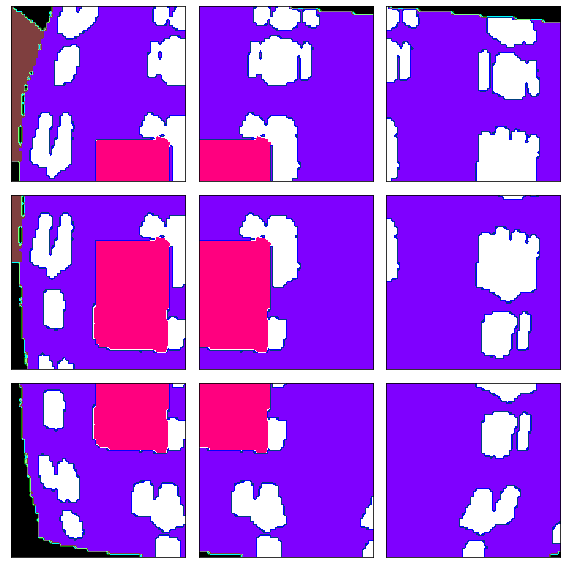

In [34]:
sliding_obj.show_slices(num_class=10)

In [25]:
print(f"annot_arr.shape: {sample_ann.shape}")
print(f"N_dim: {sliding_obj.N_dim}")
print(f"w_dim: {sliding_obj.w_dim}")
print(f"w_stride: {sliding_obj.w_stride}")
print(f"sliced_arr.shape: {sliding_obj.sliced_arr.shape}")

annot_arr.shape: (128, 128, 1)
N_dim: 128
w_dim: 64
w_stride: 32
sliced_arr.shape: (9, 64, 64, 1)


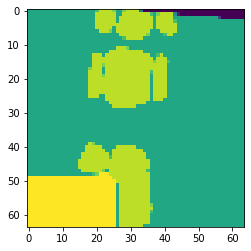

In [26]:
sliced = sliding_obj.sliced_arr
ind =1
plt.imshow(sliced[ind, :, :, 0])
plt.show()

In [27]:
annot_db = sort_img_arr_by_class(sliced, PKG_1_PARAMS)

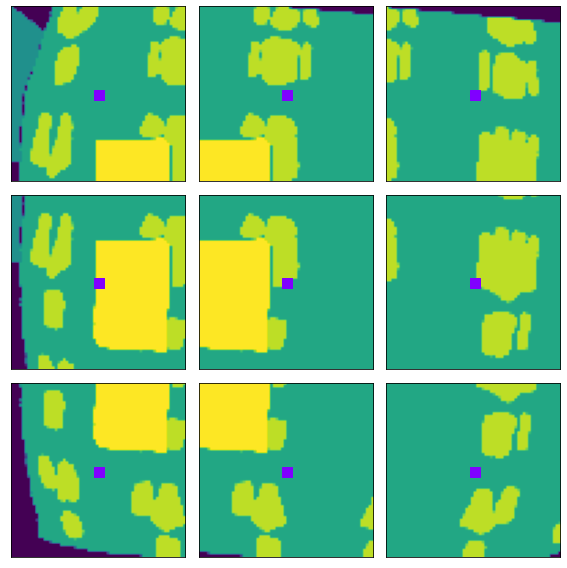

In [28]:
sliding_obj.show_slices_overlay(num_class=10)

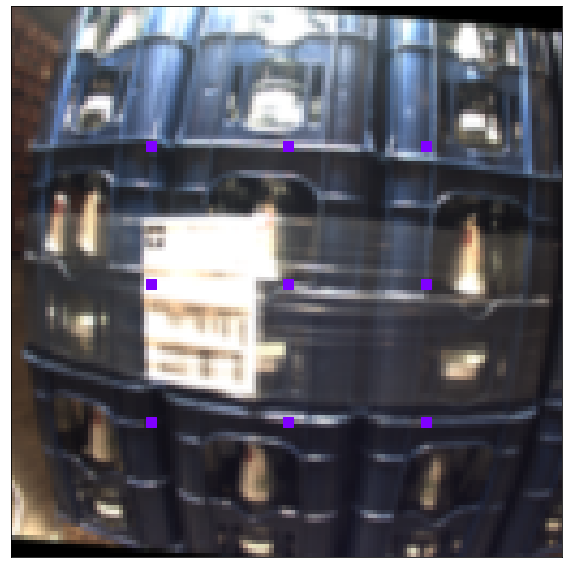

In [29]:
sliding_obj.image_overlay(img_arr[index,:,:,3:6])

In [30]:
np.array(sliding_obj.sort_img_arr_by_class())

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6]], dtype=int64)

## Sample out of Network

In [16]:
sample_img = np.load(DATASET_PATH/ "output_img.npy")
sample_ann = np.load(DATASET_PATH/ "output_ann.npy")

In [17]:
my_scale = 4
sliding_obj = SlidingWindow(sample_ann, w_scale=my_scale, PARAMS= PKG_1_PARAMS)

In [18]:
sliding_obj.show_slices(num_class=10)

IndexError: too many indices for array